# Exam Performance & Sleep Dataset
***
<br>
This synthesized dataset is based on studies investigating the relationship between sleep and academic performance. The data focuses on performance in exams and how sleep effects student results. The principal variables I decided to investigate were student Bedtimes, wake up times, sleep duration and exam grade score. I chose these variables after finding several similarly orientated research papers that provided me with some valuable statistics.[1][2] For example, in the paper *Sleep quality, duration, and consistency are associated with better academic performance in college students* [1] they give students an average bed time of 1:54am (stdev:1 hour) and an average wake time of 9:17am (stdev:54 mins). The paper found that student's test scores could be predicted based on whether they deviated from the median wakeup/sleep values. Student who went to bed before the median bedtime had an exam score of 77.25% (stdev:13.71%) compared to those who went to bed after, who had a score of 70.68% (stdev:11.01%). With wake-up time, the paper found students who woke up before the median time performed significantly better (78.28% stdev: 9.33%) than those who got up later (69.63% stdev:14.38%).
<br><br>
Using these statistics, I first generated 200 sleep values around the 1:54am mean bedtime. To do this I used the NumPy random.normal distribution, passing in the hour and standard deviation value. Next, I did the same with the 9:17am wake up time and placed both of these into a Pandas dataframe. With these values I then calculated the sleep duration, using the datetime module to subtract the the Sleep_Time column from the Wake_Time one. I then looped through the dataframe, firstly fixing any bad subtractions from the previous step, where students may have gone to bed before midnight and then to assign a grade value to each row based on the students sleep time. The assigned grade was based off whether they went to bed before the median specified in the study, in practice this was implemented by using instances of the random.normal fuction again. 
<br><br>
While this was done for all 200 rows of the dataset, I decided that I wanted to investigate sleep time and wakeup time independently, something that wasn't specified in the paper. With this in mind, I looped through only the first 100 values of the dataset once more, and generated the grades solely based off student wakeup time rather than bedtime. As a result, the dataset now contained 100 students with grades based on their wake up time and 100 with grades based on their bed time only. 
<br><br>
While researching this topic I also found several papers that sought to investigate the relationship between sleep duration and exam results[2][3][4]. Several of them concluded a positive correlation existed and that students who got more sleep in general and ahead of an exam can expect better results. Based on the study *Sleep Duration and Academic Performance Among Student Pharmacists*[3], I decided to penalize students who received less than 6.12 hours of sleep in an effort to account for this. 
<br><br>
When the dataset is plotted, a clear correlation can be observed between the sleep time of a student and the overall grade they receive, students who go to bed before the median appear significantly more likely to score a higher grade. A similar correlation appears with measuring wake up time against grade score, with students who wake up before the median seeing a higher score than their late rising counterparts. Finally, although not as strong as previously observed trends, a positive correlation appears to exist between sleep duration and exam performance.
<br><br>
[1] Nature, Sleep quality, duration, and consistency are associated with better academic performance in college students, Kana Okano, Jakub R. Kaczmarzyk, https://www.nature.com/articles/s41539-019-0055-z

[2] The Physics Teacher, To Study or to Sleep: How Seeing the Effect of Sleep Deprivation Changed Students’ Choices, Vincent P. Coletta, https://aapt.scitation.org/doi/10.1119/1.5145469

[3] US National Library of Medicine, Sleep Duration and Academic Performance Among Student Pharmacists, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4571043/

[4] ResearchGate, The Impact of Duration of Sleep on Academic Performance in University Students, Heather Raley https://www.researchgate.net/publication/331067054_The_Impact_of_Duration_of_Sleep_on_Academic_Performance_in_University_Students

In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#Display options
plt.style.use('default')
pd.set_option('display.max_rows', 500)

In [2]:
def GenerateData(): 
    #Sleep stdev in hours (1.9hours = 1:54am)(stdev = 1hr)
    SleepVals = np.round(np.random.normal(1.9, 1, 200), 2)

    #Added to dataframe
    df = pd.DataFrame({'Sleep_Time': SleepVals})

    #Converted to datetime and formatted as string
    df["Sleep_Time"] = pd.to_datetime(df.Sleep_Time, unit='h').dt.strftime('%H:%M:%S')

    #Simulated Wake up values (9.28 = 9:17)(stdev = 54mins)
    WakeVals = np.round(np.random.normal(9.28, 0.9, 200), 2)

    #Added to dataframe and converted to datetime.
    df["Wake_Time"] = WakeVals
    df["Wake_Time"] = pd.to_datetime(df.Wake_Time, unit='h').dt.strftime('%H:%M:%S')

    #Coverted to timedeltas and subtracted for total sleep duration
    df.Sleep_Time = pd.to_timedelta(df.Sleep_Time)
    df.Wake_Time = pd.to_timedelta(df.Wake_Time)
    duration = abs(df.Wake_Time - df.Sleep_Time)
    #Sleep Duration added to dataframe.
    df["Sleep_Duration"] = duration

    #Median Wake Up time (9.12am)
    medianWakeTime = datetime.timedelta(hours=9.2)
    #Median Sleep Time (1.47am)
    medianSleepTime = datetime.timedelta(hours=1.78)

    #Loop through dataframe
    for i in df.index:
        #check if sleep is abnormally high (went to bed before midnight) and correct sleep duration.
        if df.at[i, 'Sleep_Duration'] > datetime.timedelta(hours=12.5):
            df.at[i, 'Sleep_Duration'] = df.at[i, 'Wake_Time'] + (datetime.timedelta(hours=24) - df.at[i, 'Sleep_Time'])
        #If Sleep time was before the median, slightly better performance expected
        if df.at[i, 'Sleep_Time'] < medianSleepTime:
            df.at[i, 'Grade'] = np.random.normal(77.25,13.71)
            df.at[i, 'Investigation'] = "Sleep Time"
            df.at[i, 'Before_Median'] = "Yes"
        #If sleep time was after the median, slightly worse performance expected
        if df.at[i, 'Sleep_Time'] > medianSleepTime:
            df.at[i, 'Grade'] = np.random.normal(70.68,11.01)
            df.at[i, 'Investigation'] = "Sleep Time"
            df.at[i, 'Before_Median'] = "No"
        #If sleep time was before midnight, higher performance expected
        if df.at[i, 'Sleep_Time'] > datetime.timedelta(hours=21):
            df.at[i, 'Grade'] = np.random.normal(77.25,13.71)
            df.at[i, 'Investigation'] = "Sleep Time"
            df.at[i, 'Before_Median'] = "Yes"

    #First 100 people in the dataframe investiagted by wakeup time.
    for i in range(100):
        #If wake time is less than the median, significant performance increase
        if df.at[i, 'Wake_Time'] < medianWakeTime:
            df.at[i, 'Grade'] = np.random.normal(78.28,9.33)
            df.at[i, 'Investigation'] = "Wake Time"
            df.at[i, 'Before_Median'] = "Yes"
        #If wake time after, significant decrease to performance.
        if df.at[i, 'Wake_Time'] > medianWakeTime:
            df.at[i, 'Grade'] = np.random.normal(69.63,14.38)
            df.at[i, 'Investigation'] = "Wake Time"
            df.at[i, 'Before_Median'] = "No"
            
    for i in df.index:
        if df.at[i, 'Sleep_Duration'] < datetime.timedelta(hours=6.12):
            penalty = np.random.normal(68,5)
            if df.at[i, 'Grade'] > penalty:
                df.at[i, 'Grade'] -= abs(df.at[i, 'Grade'] - penalty)

    #Accounting for grades above 100.
    for i in df.index:
        if df.at[i, 'Grade'] > 100:
            df.at[i, 'Grade'] = 100
            
    
    return df


## Plotting Data
***

In [3]:
#Loading the data
df = GenerateData()

#variables for each sub selection
wakeGrade = df[df["Investigation"] == "Wake Time"]["Grade"]
wakeTime = df[df["Investigation"] == "Wake Time"]["Wake_Time"]
wakeBefore = df[df["Investigation"] == "Wake Time"]["Before_Median"]
sleepGrade = df[df["Investigation"] == "Sleep Time"]["Grade"]
sleepTime = df[df["Investigation"] == "Sleep Time"]["Sleep_Time"]
sleepBefore = df[df["Investigation"] == "Sleep Time"]["Before_Median"]


#Converting sleep time to a float and replacing values before midnight.
sleep = np.array(sleepTime / np.timedelta64(1, 'h'))
np.round(sleep,2)
for n, i in enumerate(sleep):
    if i > 21:
        sleep[n] -= 24

#Wake up converted to float.
wake = np.array(wakeTime / np.timedelta64(1, 'h'))

#Sleep Durations converted to floats.
length = np.array(df["Sleep_Duration"] / np.timedelta64(1, 'h'))

(-0.4, 4.0)

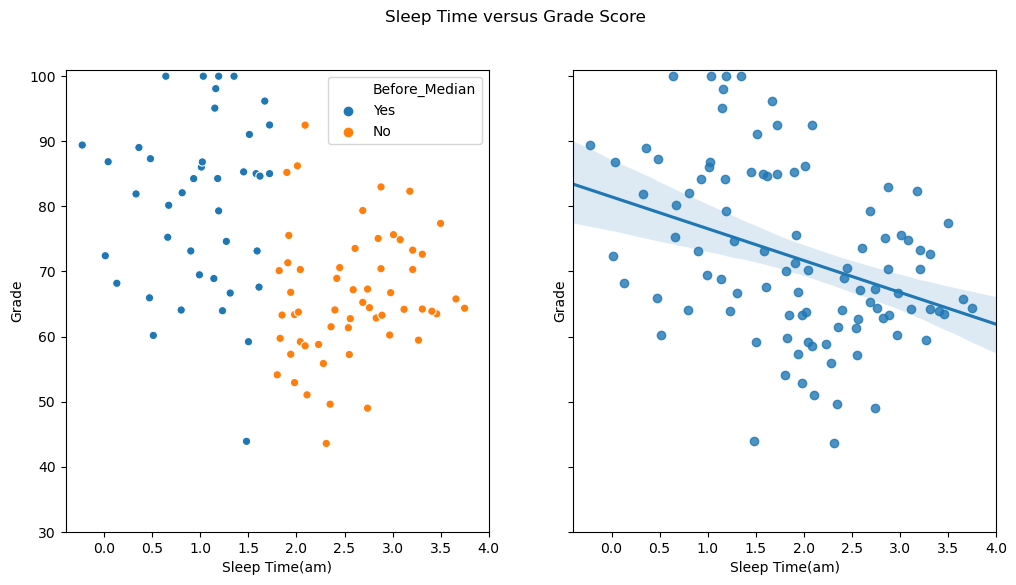

In [4]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
fig.suptitle("Sleep Time versus Grade Score")
sns.scatterplot(ax=axes[0],data=df, x=sleep, y=sleepGrade, hue=sleepBefore)
axes[0].set_xlabel('Sleep Time(am)')
axes[0].set_xlim([-0.4, 4])
axes[0].set_ylim([30, 101])
sns.regplot(ax=axes[1], data=df, x=sleep, y=sleepGrade)
axes[1].set_xlabel('Sleep Time(am)')
axes[1].set_xlim([-0.4, 4])

(7.0, 11.5)

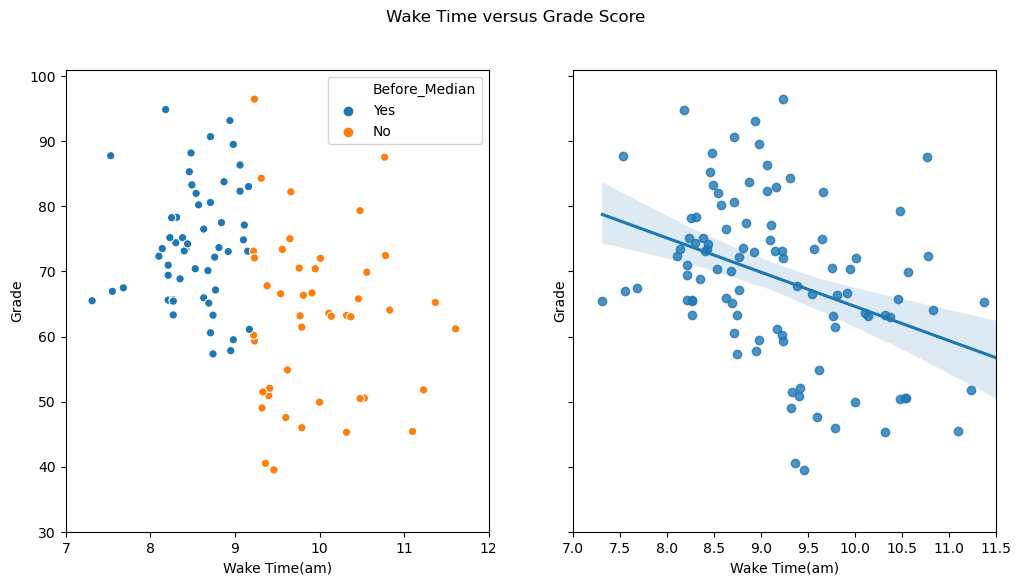

In [5]:
fig1, axes1 = plt.subplots(1, 2, sharey=True, figsize=(12,6))
fig1.suptitle("Wake Time versus Grade Score")
sns.scatterplot(ax=axes1[0],data=df, x=wake, y=wakeGrade, hue=wakeBefore)
axes1[0].set_xlabel('Wake Time(am)')
axes1[0].set_xlim([7, 12])
axes1[0].set_ylim([30, 101])
sns.regplot(ax=axes1[1], data=df, x=wake, y=wakeGrade)
axes1[1].set_xlabel('Wake Time(am)')
axes1[1].set_xlim([7,11.5])

Text(0.5, 1.0, 'Sleep Distribution')

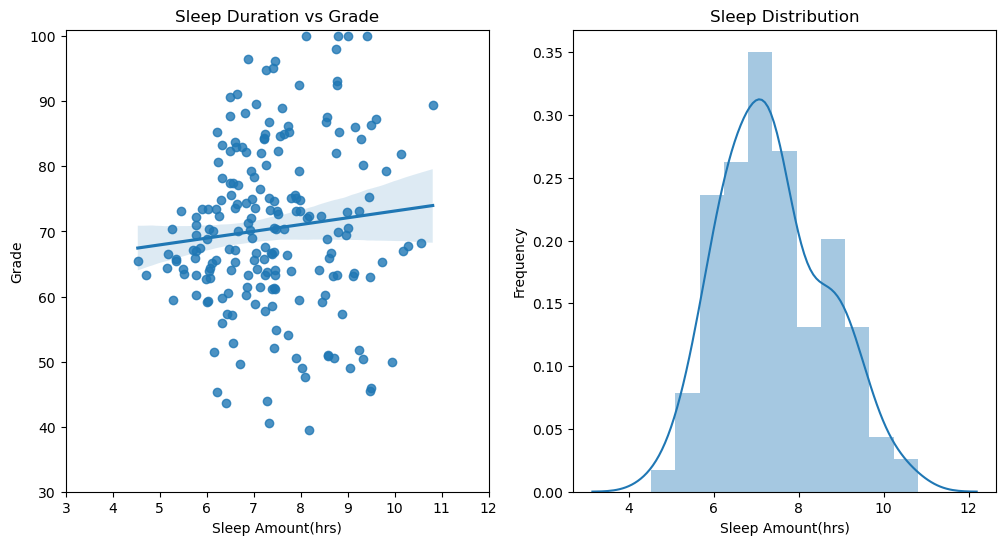

In [6]:
fig2, axes2 = plt.subplots(1, 2, figsize=(12,6))
sns.regplot(ax=axes2[0],data=df, x=length, y="Grade")
axes2[0].set_xlabel('Sleep Amount(hrs)')
axes2[0].set_xlim([3, 12])
axes2[0].set_ylim([30, 101])
axes2[0].set_title('Sleep Duration vs Grade')
sns.distplot(length,ax=axes2[1])
axes2[1].set_xlabel('Sleep Amount(hrs)')
axes2[1].set_ylabel('Frequency')
axes2[1].set_title('Sleep Distribution')

***